## Vanilla kNN
This notebook implements vanilla kNN to classify handwritten digits available [here](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits).

### Import libraries and data

In [11]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from statistics import mode
import matplotlib.pyplot as plt

# system-agnostic utils file import
root_dir_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(root_dir_path)
import utils

pd.set_option("display.max_colwidth", None)

In [13]:
# load the dataset
digits_data = load_digits()
X = digits_data.data
y = digits_data.target
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train[0:2, :]

array([[ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
        16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
         9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
         0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  0., 13., 13., 13.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  9., 15.,  0.,  0.,  0.,  0.,
         9., 12., 15., 16., 10.,  0.,  0.,  4., 16., 16., 16., 11.,  3.,
         0.,  0.,  0.,  4.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  1.,  0.,  0.,  0.]])

In [14]:
# unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} time(s).")

0 occurs 125 time(s).
1 occurs 132 time(s).
2 occurs 130 time(s).
3 occurs 129 time(s).
4 occurs 121 time(s).
5 occurs 116 time(s).
6 occurs 128 time(s).
7 occurs 124 time(s).
8 occurs 131 time(s).
9 occurs 121 time(s).


Scale the training and test data.

In [15]:
normalized_training_features = utils.minmax_normalize_2d_array(X_train)
X_train = None
normalized_test_features = utils.minmax_normalize_2d_array(X_test)
X_test = None
normalized_training_features[0:2, :]

array([[0.        , 0.        , 0.3125    , 0.8125    , 0.8125    ,
        0.5       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.6875    , 0.8125    , 1.        , 0.375     ,
        0.        , 0.        , 0.0625    , 1.        , 0.3125    ,
        0.125     , 0.875     , 0.5625    , 0.        , 0.        ,
        0.        , 0.5625    , 1.        , 1.        , 0.9375    ,
        0.        , 0.        , 0.        , 0.        , 0.625     ,
        1.        , 0.875     , 0.875     , 0.        , 0.        ,
        0.        , 0.3125    , 0.9375    , 0.25      , 0.        ,
        1.        , 0.375     , 0.        , 0.        , 0.375     ,
        0.875     , 0.4375    , 0.375     , 1.        , 0.25      ,
        0.        , 0.        , 0.        , 0.4375    , 0.9375    ,
        1.        , 0.625     , 0.        , 0.        ],
       [0.        , 0.        , 0.1875    , 0.875     , 1.        ,
        0.875     , 0.        , 0.        , 0.        , 0. 

In [8]:
class K_Nearest_Neighbors:
    def __init__(self, training_features, training_labels, k):
        """
        Store the training features and labels.
        """
        self.X_train = training_features
        self.y_train = training_labels
        self.k = k

    def fit(self):
        """
        Since kNN is a lazy learner, there is no fit / training step.
        """
        pass

    def predict(self, test_sample):
        # first find k nearest samples from the test sample
        closest_k_labels = []
        closest_k_indices = set()

        # iterate over the entire training data over and over until k -nearest not found
        iteration = 0
        while len(closest_k_labels) < self.k:
            iteration += 1
            current_closest_distance = 10000  # a large positive value
            current_closest_index = None
            current_closest_label = None

            # for each training sample
            for idx, sample in enumerate(self.X_train):
                # if not already in the closest-k pool
                if idx not in closest_k_indices:
                    # calculate the distance between the training sample and the test sample
                    curr_euclidean_distance = np.linalg.norm(test_sample - sample)

                    if curr_euclidean_distance < current_closest_distance:
                        current_closest_distance = curr_euclidean_distance
                        current_closest_index = idx
                        current_closest_label = y_train[idx]
            # store the index of the chosen training sample so that it is ignored in the next iteration of while loop
            closest_k_indices.add(current_closest_index)
            closest_k_labels.append(current_closest_label)

        return mode(closest_k_labels)

### Inference

In [9]:
# predict test samples
k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
accuracies = []

for k in k_values:
    kNN = K_Nearest_Neighbors(normalized_training_features, y_train, k)
    preds = []
    for test_sample_idx in range(0, len(y_test)):
        prediction = kNN.predict(normalized_test_features[test_sample_idx, :])
        preds.append(prediction)
    accuracy = utils.calculate_accuracy(y_test, preds)
    print("\n For k == ", k, ", accuracy = ", accuracy)
    accuracies.append(accuracy)


 For k ==  1 , accuracy =  98.51851851851852

 For k ==  5 , accuracy =  99.07407407407408

 For k ==  10 , accuracy =  97.96296296296296

 For k ==  15 , accuracy =  97.77777777777777

 For k ==  20 , accuracy =  97.4074074074074

 For k ==  25 , accuracy =  96.66666666666667

 For k ==  30 , accuracy =  96.66666666666667

 For k ==  35 , accuracy =  95.74074074074073

 For k ==  40 , accuracy =  95.0

 For k ==  45 , accuracy =  94.44444444444444

 For k ==  50 , accuracy =  93.7037037037037


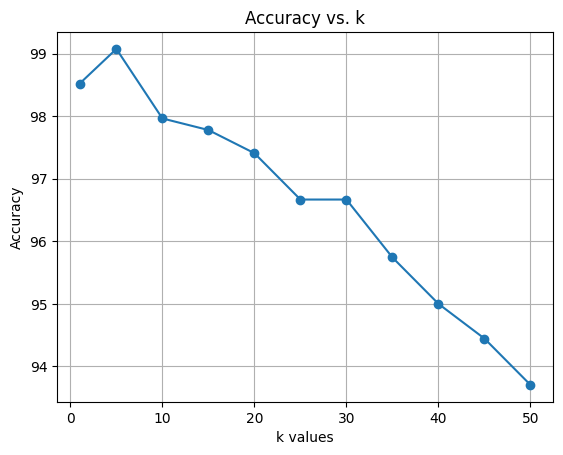

In [12]:
# Plot the accuracies
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k")
plt.grid(True)
plt.show()

As seen here, for this particular dataset, the accuracy decreases with an increase in k. However, there is no specific rule on whether the accuracy should increase or decrease with the change in k for kNN algorithms since it is determined by several factors such as proximity of another cluster closeby, number of training samples of a certain class, etc.

### Time Complexity of Vanilla kNN and Improvement
Given that we know the dimension of each sample in the training set, the Eucledian distance calculation becomes of O(1) time complexity. 
In the `prediction()` method of kNN above, the while loop runs for `k` times until the closest k training samples are found. For each such iteration of the while loop, the algorithm calculates the distance between the test sample and each of the training samples. Since there are m training samples, assuming the Eucledian distance calculation between two points in feature space of n dimensions is of constant time complexity, the total time complexity of the kNN `prediction()` method becomes O(k * m * 1).<br><br>
This time complexity can, however, be improved with the usage of a Priority Queue. The next notebook contains the Priority Queue implementation of kNN.